In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.request import urlopen

import matplotlib.pyplot as plt
from PIL import Image

from mplsoccer import PyPizza, add_image, FontManager, Radar


In [4]:
df = pd.read_csv('Data/dataset_futbol_limpio_1.0.csv', delimiter=',', index_col='Player')
print(df.columns)
df



Index(['Nation', 'Pos', 'Squad', 'Comp', 'Age', 'MP', 'Starts', 'Min', '90s',
       'Goals',
       ...
       'Off', 'Crs', 'TklW', 'PKwon', 'PKcon', 'OG', 'Recov', 'AerWon',
       'AerLost', 'AerWon%'],
      dtype='object', length=121)


,Nation,Pos,Squad,Comp,Age,MP,Starts,Min,90s,Goals,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
Player,,,,,,,,,,,,,,,,,,,,,
Brenden Aaronson,USA,MF,Leeds United,Premier League,22,20,19,1596,17.7,1,...,0.17,2.54,0.51,0.0,0.0,0.00,4.86,0.34,1.19,22.2
Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,35,22,22,1980,22.0,0,...,0.05,0.18,1.59,0.0,0.0,0.00,6.64,2.18,1.23,64.0
Himad Abdelli,FRA,MF,Angers,Ligue 1,23,14,8,770,8.6,0,...,0.00,1.05,1.40,0.0,0.0,0.00,8.14,0.93,1.05,47.1
Salis Abdul Samed,GHA,MF,Lens,Ligue 1,22,20,20,1799,20.0,1,...,0.00,0.35,0.80,0.0,0.0,0.05,6.60,0.50,0.50,50.0
Laurent Abergel,FRA,MF,Lorient,Ligue 1,30,15,15,1165,12.9,0,...,0.00,0.23,2.02,0.0,0.0,0.00,6.51,0.31,0.39,44.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Szymon ?urkowski,POL,MF,Fiorentina,Serie A,25,2,0,32,0.4,0,...,0.00,2.50,0.00,0.0,0.0,0.00,5.00,2.50,2.50,50.0
Szymon ?urkowski,POL,MF,Spezia,Serie A,25,1,0,8,0.1,0,...,0.00,0.00,0.00,0.0,0.0,0.00,30.00,0.00,0.00,0.0
Martin Ødegaard,NOR,MF,Arsenal,Premier League,24,20,20,1684,18.7,8,...,0.05,2.51,0.70,0.0,0.0,0.00,5.19,0.48,0.70,40.9


In [24]:

def compare_players(df, jugador1, jugador2, params):

    #Sacamos los valores de ambos jugadores para los parametros que le hemos pasado
    valores_jugador1 = df.loc[jugador1, params].values
    valores_jugador2 = df.loc[jugador2, params].values
    print(valores_jugador1)
    low = []
    high = []

    #Aqui vamos a establecer los limites para los rangos de las estadisticas
    for param in params:
        low.append(0)  # Empezamos desde 0 para todas las estadísticas

        #Valores del dataframe para los rangos de las estadisticas
        if df[param].dtype in [int, np.int64]:
            high.append(df[param].max())  # Usamos el máximo para estadísticas enteras
        else:
            high.append(df[param].quantile(0.95))  # 95º percentil para estadísticas continuas


    # Crear el objeto Radar
    radar = Radar(params, low, high,
                  round_int=[df[param].dtype in [int, np.int64] for param in params], #Redondeamos los valores si son enteros  o np.int64
                  num_rings=4, #Numero de anillos
                  ring_width=1, center_circle_radius=1) #Ancho del anillo y radio del circulo central
    

# Creamos el grafico
    fig, ax = radar.setup_axis()# funcion para configurar los ejes
    rings_inner = radar.draw_circles(ax=ax, facecolor='#ffb2b2', edgecolor='#fc5f5f')
    radar_output = radar.draw_radar_compare(valores_jugador1, valores_jugador2, ax=ax, #Dibujamos los radios
                                            kwargs_radar={'facecolor': '#00f2c1', 'alpha': 0.6, 'label': jugador1}, # '''''''
                                            kwargs_compare={'facecolor': '#d80499', 'alpha': 0.6, 'label': jugador2}) #Configuraciones esteticas
    

    radar_poly, radar_poly2, vertices1, vertices2 = radar_output #Sacamos los vertices de los radios
    range_labels = radar.draw_range_labels(ax=ax, fontsize=15) #Dibujamos las etiquetas de los rangos
    param_labels = radar.draw_param_labels(ax=ax, fontsize=15) #Dibujamos las etiquetas de los parametros

    # Informacion añadida de los jugadores
    info_jugador1 = f"{jugador1}\n{df.loc[jugador1, 'Squad']}\nMatches: {df.loc[jugador1, 'MP']}\nMinutes: {df.loc[jugador1, 'Min']}"
    info_jugador2 = f"{jugador2}\n{df.loc[jugador2, 'Squad']}\nMatches: {df.loc[jugador2, 'MP']}\nMinutes: {df.loc[jugador2, 'Min']}"

    #Texto de la figura
    plt.figtext(0.1, 0.95, info_jugador1, fontsize=12, ha='left', va='top')
    plt.figtext(0.9, 0.95, info_jugador2, fontsize=12, ha='right', va='top')

    
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2)

    plt.show()



-Ejemplos de uso:

[12 0.6 2.05 1.02 0.29 0.59 17.0 0.6 2.83 9.1 6.2 0.12 0.9 4.28 0.06 0.3]


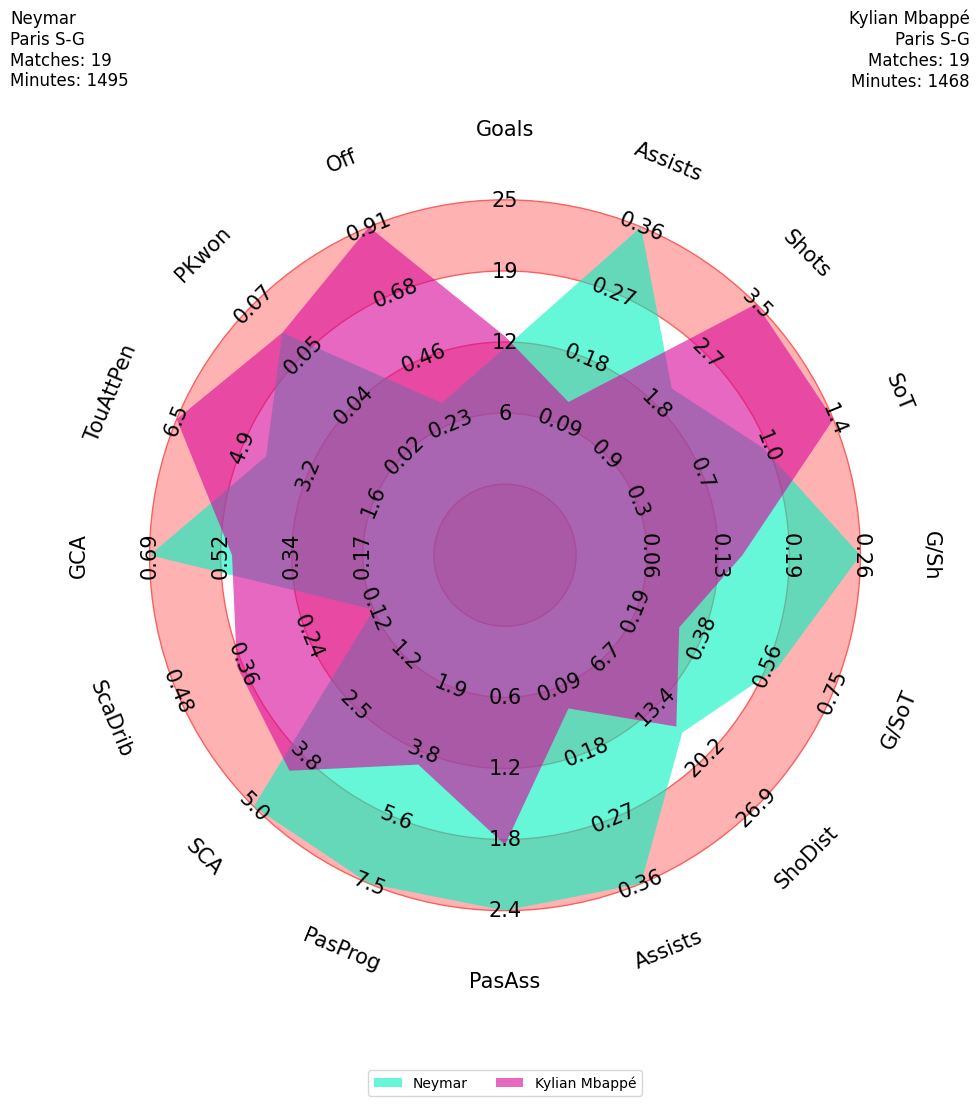

In [34]:
params = ['Goals', 'Assists', 'Shots', 'SoT', 'G/Sh', 'G/SoT', 'ShoDist', 'Assists', 'PasAss', 'PasProg', 'SCA', 'ScaDrib', 'GCA', 'TouAttPen', 'PKwon', 'Off']

compare_players(df, 'Neymar', 'Kylian Mbappé', params)

[0 0.14 2.16 8.65 4.19 0.0 45.5 1.89 2.43 0.54 0.14]


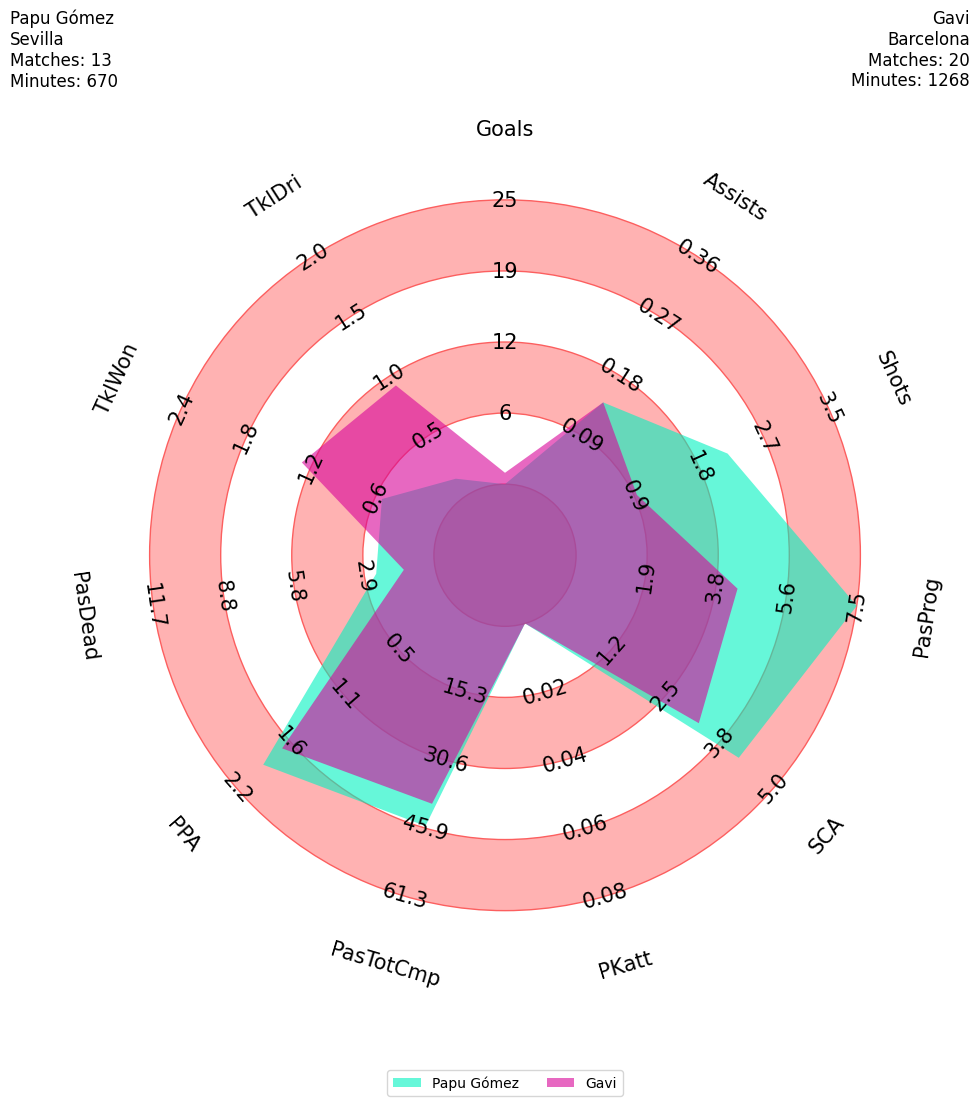

In [33]:
params = ['Goals', 'Assists', 'Shots', 'PasProg', 'SCA', 'PKatt', 'PasTotCmp', 'PPA', 'PasDead', 'TklWon', 'TklDri']
compare_players(df, 'Papu Gómez', 'Gavi', params)

[0 0.0 3.75 1.07 75.0 52.9 1.25 5.36]


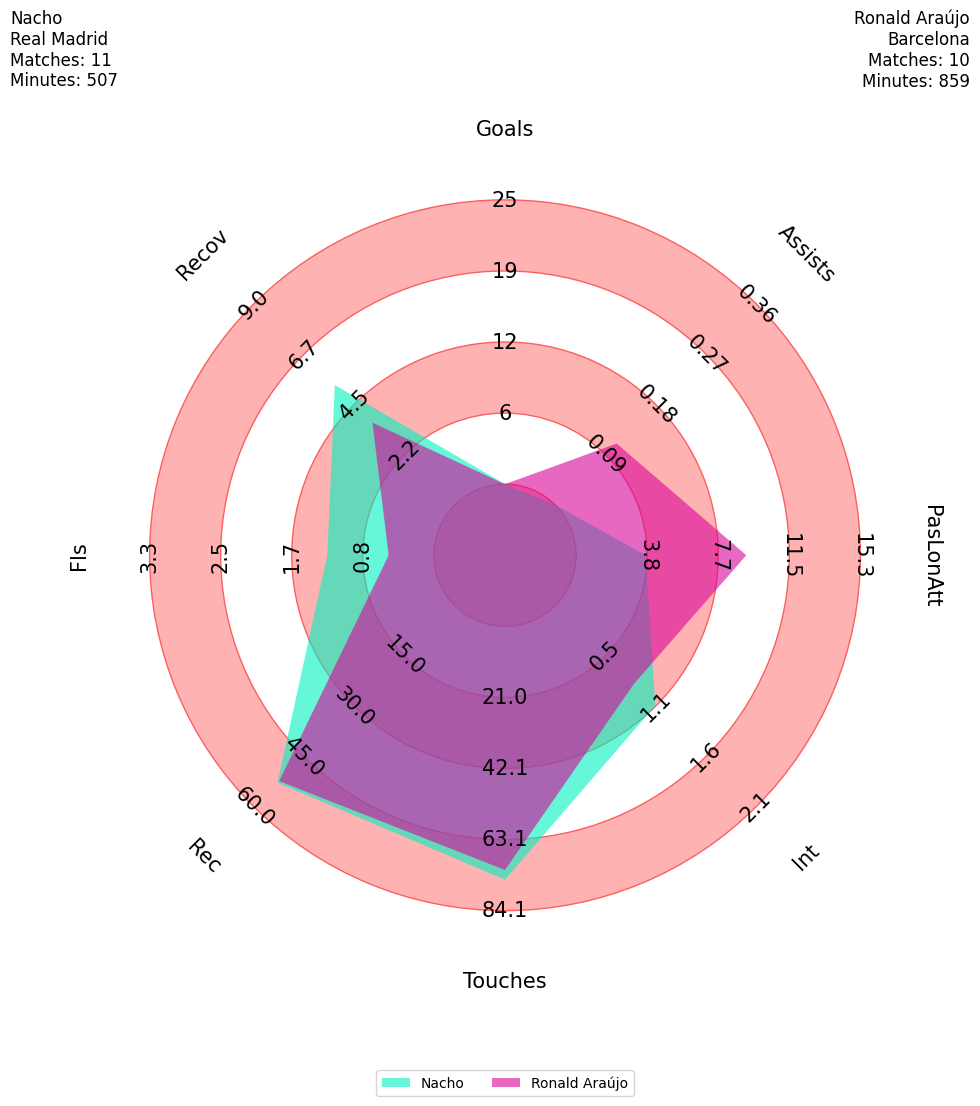

In [38]:
params = ['Goals', 'Assists', 'PasLonAtt', 'Int', 'Touches', 'Rec', 'Fls', 'Recov' ]
compare_players(df,'Nacho', 'Ronald Araújo', params)